<a href="https://colab.research.google.com/github/heinhtet14/Machine_Learning_Bootcamp/blob/main/KNN_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN
How does it work?

1. Calculate the distance between a test point and training points.
2. Select the k closest neighbour based on a distance.
3. Assign a class (for classification task) and for regression task ( predict the value)

Algorithm steps
1. Load dataset
2. Calculate the distance
3. Write a function to find the k nearest neighbour
4. Write a function to predict the value
5. Test

In [1]:
# import libs
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
# load the dataset
data = load_iris()
x = data['data']# features
y = data['target']# labels

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Euclidean Distance Formula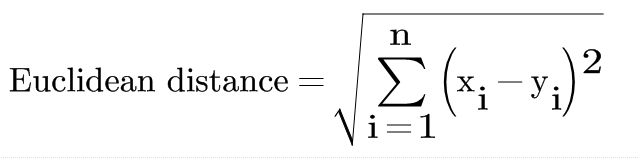


In [24]:
# Function for calculating the distance
def euclidean_distance(point1, point2):
    #point1 = point1[:2]
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [4]:
# Find the K nearest neighbour
def get_k_neighbour(training_data, training_labels, test_point,k):
  distance = []
  # Calculate the distance from the test point and the training points
  for idx, point in enumerate(training_data):
    dist = (euclidean_distance(point, test_point), training_labels[idx])
    distance.append((dist, training_labels[idx]))
  # sort the distance and find the k
  sorted_neighbours = sorted(distance, key=lambda x: x[0])
  return [label for _, label in sorted_neighbours[:k]]

In [5]:
# predict the class
def predict_class(training_data, training_labels, test_point, k):
  neighbours = get_k_neighbour(training_data, training_labels, test_point, k)
  # count the common class
  count = Counter(neighbours)
  return count.most_common(1)[0][0]

In [14]:
# predict the whole test dataset
def knn_classification(X_train, y_train, X_test, k):
  y_pred = []
  for test_point in X_test:
    pred = predict_class(X_train, y_train, test_point, k)
    y_pred.append(pred)
  return np.array(y_pred)

In [16]:
# evaluate the model
k = 3
y_pred = knn_classification(X_train, y_train, X_test, k)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [25]:
# Visualize
import matplotlib.pyplot as plt

def plot_decision_boundaries(X_train, y_train, k):
    h = 0.1
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    Z = [predict_classification(X_train, y_train, point, k) for point in grid_points]
    Z = np.array(Z).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', s=20)
    plt.title(f"Decision Boundaries with k={k}")
    plt.show()


**Decision Tree**

used for classification and regression. it works by splitting the data based on feature values to create a tree-like model of decision.

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # Important
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # Visualize

In [31]:
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Train the decision tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


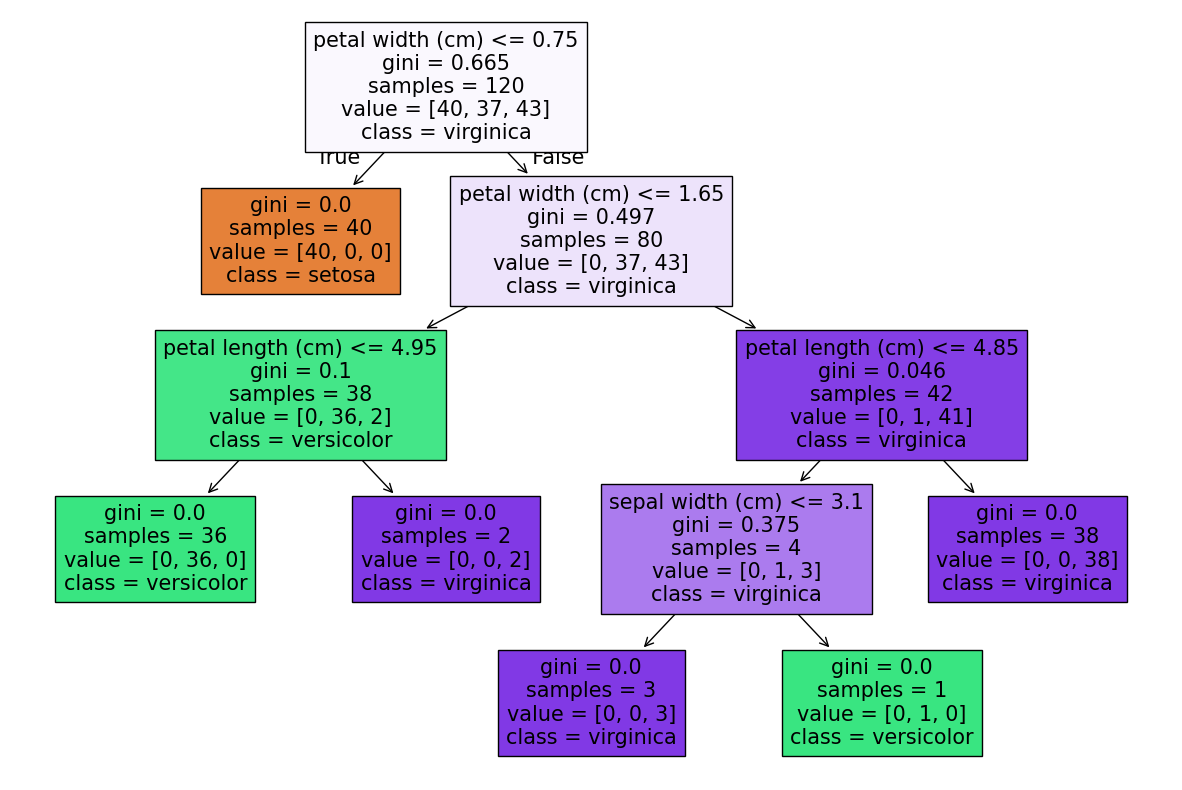

In [34]:
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()